In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
sample = pd.read_csv("../jpx-tokyo-stock-exchange-prediction/example_test_files/sample_submission.csv")
sample

,Date,SecuritiesCode,Rank
0,2021-12-06,1301,0
1,2021-12-06,1332,1
2,2021-12-06,1333,2
3,2021-12-06,1375,3
4,2021-12-06,1376,4
...,...,...,...
111995,2022-02-28,9990,1995
111996,2022-02-28,9991,1996
111997,2022-02-28,9993,1997
111998,2022-02-28,9994,1998


In [3]:
sample.nunique()

Date                56
SecuritiesCode    2000
Rank              2000
dtype: int64

In [4]:
stock_prices = pd.read_csv("../jpx-tokyo-stock-exchange-prediction/train_files/stock_prices.csv")
stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [6]:
stock_prices["Date"] = pd.to_datetime(stock_prices["Date"])
stock_prices

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324
2,20170104_1333,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,1.0,NaN,False,0.006154
3,20170104_1376,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,1.0,NaN,False,0.011053
4,20170104_1377,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,1.0,NaN,False,0.003026
...,...,...,...,...,...,...,...,...,...,...,...,...
2332526,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
2332527,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
2332528,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
2332529,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [7]:
tmpdf = stock_prices[stock_prices["SecuritiesCode"]==1301].reset_index(drop=True)
tmpdf.head(3)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092


In [8]:
tmpdf["Close_shift1"] = tmpdf["Close"].shift(-1)
tmpdf["Close_shift2"] = tmpdf["Close"].shift(-2)

tmpdf["rate"] = (tmpdf["Close_shift2"] - tmpdf["Close_shift1"]) / tmpdf["Close_shift1"]
tmpdf

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,Close_shift1,Close_shift2,rate
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,2738.0,2740.0,0.000730
1,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,2740.0,2748.0,0.002920
2,20170106_1301,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,2748.0,2745.0,-0.001092
3,20170110_1301,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,2745.0,2731.0,-0.005100
4,20170111_1301,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,2731.0,2722.0,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,20211129_1301,2021-11-29,1301,2975.0,2984.0,2951.0,2951.0,14300,1.0,NaN,False,0.003793,2900.0,2911.0,0.003793
1198,20211130_1301,2021-11-30,1301,2953.0,2997.0,2900.0,2900.0,20500,1.0,NaN,False,0.007558,2911.0,2933.0,0.007558
1199,20211201_1301,2021-12-01,1301,2909.0,2936.0,2909.0,2911.0,10600,1.0,NaN,False,0.016706,2933.0,2982.0,0.016706
1200,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689,2982.0,NaN,NaN


In [9]:
tmpdf2 = stock_prices[stock_prices["Date"]=="2021-12-02"].reset_index(drop=True)
tmpdf2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20211202_1301,2021-12-02,1301,2949.0,2973.0,2933.0,2933.0,15200,1.0,NaN,False,-0.003689
1,20211202_1332,2021-12-02,1332,566.0,577.0,565.0,573.0,1525800,1.0,NaN,False,0.006838
2,20211202_1333,2021-12-02,1333,2276.0,2314.0,2267.0,2303.0,157000,1.0,NaN,False,0.008058
3,20211202_1375,2021-12-02,1375,1220.0,1244.0,1209.0,1212.0,121600,1.0,NaN,False,-0.008907
4,20211202_1376,2021-12-02,1376,1353.0,1373.0,1327.0,1327.0,7800,1.0,NaN,False,0.014264
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211202_9990,2021-12-02,9990,518.0,519.0,507.0,507.0,109500,1.0,NaN,False,-0.020833
1996,20211202_9991,2021-12-02,9991,777.0,791.0,775.0,778.0,46600,1.0,NaN,False,-0.011335
1997,20211202_9993,2021-12-02,9993,1672.0,1685.0,1650.0,1650.0,6900,1.0,NaN,False,-0.010942
1998,20211202_9994,2021-12-02,9994,2340.0,2382.0,2340.0,2362.0,9200,1.0,NaN,False,0.012139


In [12]:
tmpdf2["rank"] = tmpdf2["Target"].rank(ascending=False,method="first") -1 
tmpdf2 = tmpdf2.sort_values("rank").reset_index(drop=True)
tmpdf2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0
3,20211202_9632,2021-12-02,9632,8110.0,8150.0,8000.0,8030.0,3900,1.0,NaN,False,0.107011,3.0
4,20211202_6958,2021-12-02,6958,510.0,525.0,502.0,517.0,639200,1.0,NaN,False,0.103113,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20211202_4483,2021-12-02,4483,8200.0,8590.0,8180.0,8410.0,320300,1.0,NaN,False,-0.085480,1995.0
1996,20211202_6879,2021-12-02,6879,731.0,745.0,702.0,707.0,735500,1.0,NaN,False,-0.087248,1996.0
1997,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0
1998,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0


In [13]:
tmpdf2_top200 = tmpdf2.iloc[:200,:]

In [14]:
weights = np.linspace(start=2, stop=1, num=200)
weights

array([2.        , 1.99497487, 1.98994975, 1.98492462, 1.9798995 ,
       1.97487437, 1.96984925, 1.96482412, 1.95979899, 1.95477387,
       1.94974874, 1.94472362, 1.93969849, 1.93467337, 1.92964824,
       1.92462312, 1.91959799, 1.91457286, 1.90954774, 1.90452261,
       1.89949749, 1.89447236, 1.88944724, 1.88442211, 1.87939698,
       1.87437186, 1.86934673, 1.86432161, 1.85929648, 1.85427136,
       1.84924623, 1.84422111, 1.83919598, 1.83417085, 1.82914573,
       1.8241206 , 1.81909548, 1.81407035, 1.80904523, 1.8040201 ,
       1.79899497, 1.79396985, 1.78894472, 1.7839196 , 1.77889447,
       1.77386935, 1.76884422, 1.7638191 , 1.75879397, 1.75376884,
       1.74874372, 1.74371859, 1.73869347, 1.73366834, 1.72864322,
       1.72361809, 1.71859296, 1.71356784, 1.70854271, 1.70351759,
       1.69849246, 1.69346734, 1.68844221, 1.68341709, 1.67839196,
       1.67336683, 1.66834171, 1.66331658, 1.65829146, 1.65326633,
       1.64824121, 1.64321608, 1.63819095, 1.63316583, 1.62814

In [15]:
tmpdf2_top200["weights"] = weights
tmpdf2_top200.head(3)

/Users/akinobu.ono/Desktop/kaggle/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weights
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0,2.000000
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0,1.994975
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0,1.989950


In [16]:
tmpdf2_top200["calc_weights"] = tmpdf2_top200["Target"] * tmpdf2_top200["weights"]
tmpdf2_top200.head(3)

/Users/akinobu.ono/Desktop/kaggle/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank,weights,calc_weights
0,20211202_4699,2021-12-02,4699,2037.0,2149.0,2037.0,2143.0,31000,1.0,NaN,False,0.231481,0.0,2.000000,0.462963
1,20211202_4488,2021-12-02,4488,5900.0,5990.0,5690.0,5700.0,57100,1.0,NaN,False,0.149254,1.0,1.994975,0.297757
2,20211202_8057,2021-12-02,8057,4710.0,4820.0,4615.0,4640.0,29800,1.0,NaN,False,0.123110,2.0,1.989950,0.244983


In [17]:
Sup = tmpdf2_top200["calc_weights"].sum()/np.mean(weights)
Sup

5.806628164587515

In [18]:
tmpdf2_bottom200 = tmpdf2.iloc[-200:,:]
tmpdf2_bottom200 = tmpdf2_bottom200.sort_values("rank",ascending = False).reset_index(drop=True)
tmpdf2_bottom200

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,rank
0,20211202_4169,2021-12-02,4169,7160.0,7870.0,7110.0,7520.0,783000,1.0,NaN,False,-0.127424,1999.0
1,20211202_3994,2021-12-02,3994,7490.0,7500.0,7060.0,7070.0,735000,1.0,NaN,False,-0.094980,1998.0
2,20211202_4168,2021-12-02,4168,4280.0,4390.0,4200.0,4335.0,72600,1.0,NaN,False,-0.094595,1997.0
3,20211202_6879,2021-12-02,6879,731.0,745.0,702.0,707.0,735500,1.0,NaN,False,-0.087248,1996.0
4,20211202_4483,2021-12-02,4483,8200.0,8590.0,8180.0,8410.0,320300,1.0,NaN,False,-0.085480,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20211202_4482,2021-12-02,4482,940.0,972.0,915.0,920.0,111600,1.0,NaN,False,-0.026205,1804.0
196,20211202_7990,2021-12-02,7990,3375.0,3390.0,3290.0,3335.0,114200,1.0,NaN,False,-0.026163,1803.0
197,20211202_6920,2021-12-02,6920,29950.0,30360.0,29540.0,30010.0,4529200,1.0,NaN,False,-0.026036,1802.0
198,20211202_4620,2021-12-02,4620,502.0,511.0,501.0,501.0,53000,1.0,NaN,False,-0.025896,1801.0


In [19]:
tmpdf2_bottom200["weights"] = weights
tmpdf2_bottom200["calc_weights"] = tmpdf2_bottom200["Target"] * tmpdf2_bottom200["weights"]
Sdown = tmpdf2_bottom200["calc_weights"].sum()/np.mean(weights)
Sdown

-9.10891259103055

In [20]:
daily_spread_return = Sup - Sdown
daily_spread_return

14.915540755618066

In [21]:
def calc_spread_return_sharpe(df: pd.DataFrame, portfolio_size: int = 200, toprank_weight_ratio: float = 2) -> float:
    """
    Args:
        df (pd.DataFrame): predicted results
        portfolio_size (int): # of equities to buy/sell
        toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
    Returns:
        (float): sharpe ratio
    """
    def _calc_spread_return_per_day(df, portfolio_size, toprank_weight_ratio):
        """
        Args:
            df (pd.DataFrame): predicted results
            portfolio_size (int): # of equities to buy/sell
            toprank_weight_ratio (float): the relative weight of the most highly ranked stock compared to the least.
        Returns:
            (float): spread return
        """
        assert df['Rank'].min() == 0
        assert df['Rank'].max() == len(df['Rank']) - 1
        weights = np.linspace(start=toprank_weight_ratio, stop=1, num=portfolio_size)
        purchase = (df.sort_values(by='Rank')['Target'][:portfolio_size] * weights).sum() / weights.mean()
        short = (df.sort_values(by='Rank', ascending=False)['Target'][:portfolio_size] * weights).sum() / weights.mean()
        return purchase - short

    buf = df.groupby('Date').apply(_calc_spread_return_per_day, portfolio_size, toprank_weight_ratio)
    sharpe_ratio = buf.mean() / buf.std()
    return sharpe_ratio

In [22]:
idcount = stock_prices.groupby("Date")["SecuritiesCode"].count().reset_index()
idcount

,Date,SecuritiesCode
0,2017-01-04,1865
1,2017-01-05,1865
2,2017-01-06,1865
3,2017-01-10,1865
4,2017-01-11,1865
...,...,...
1197,2021-11-29,2000
1198,2021-11-30,2000
1199,2021-12-01,2000
1200,2021-12-02,2000


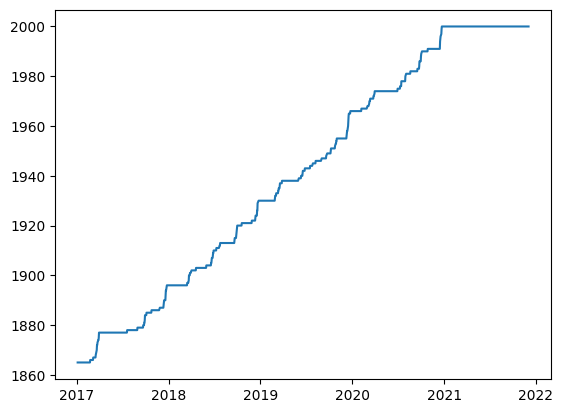

In [23]:
plt.plot(idcount["Date"],idcount["SecuritiesCode"])

In [24]:
idcount.loc[idcount["SecuritiesCode"]==2000,:]

,Date,SecuritiesCode
970,2020-12-23,2000
971,2020-12-24,2000
972,2020-12-25,2000
973,2020-12-28,2000
974,2020-12-29,2000
...,...,...
1197,2021-11-29,2000
1198,2021-11-30,2000
1199,2021-12-01,2000
1200,2021-12-02,2000


In [28]:
stock_prices2 = stock_prices.loc[stock_prices["Date"]>= "2021-01-01"].reset_index(drop=True)
stock_prices2

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20210104_1301,2021-01-04,1301,2951.0,2951.0,2913.0,2950.0,9700,1.0,NaN,False,0.011502
1,20210104_1332,2021-01-04,1332,428.0,429.0,416.0,421.0,1780500,1.0,NaN,False,0.019093
2,20210104_1333,2021-01-04,1333,2229.0,2231.0,2179.0,2202.0,112400,1.0,NaN,False,0.015075
3,20210104_1375,2021-01-04,1375,1701.0,1701.0,1672.0,1674.0,67900,1.0,NaN,False,-0.003503
4,20210104_1376,2021-01-04,1376,1597.0,1597.0,1577.0,1588.0,4500,1.0,NaN,False,-0.012033
...,...,...,...,...,...,...,...,...,...,...,...,...
451995,20211203_9990,2021-12-03,9990,514.0,528.0,513.0,528.0,44200,1.0,NaN,False,0.034816
451996,20211203_9991,2021-12-03,9991,782.0,794.0,782.0,794.0,35900,1.0,NaN,False,0.025478
451997,20211203_9993,2021-12-03,9993,1690.0,1690.0,1645.0,1645.0,7200,1.0,NaN,False,-0.004302
451998,20211203_9994,2021-12-03,9994,2388.0,2396.0,2380.0,2389.0,6500,1.0,NaN,False,0.009098


In [29]:
stock_prices2["Rank"] = stock_prices2.groupby("Date")["Target"].rank(ascending=False,method="first") -1 
stock_prices2["Rank"] =stock_prices2["Rank"].astype("int")

In [35]:
score = calc_spread_return_sharpe(stock_prices2, portfolio_size= 200, toprank_weight_ratio= 2)
score

5.7907451128813605